In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [88]:
dat_file = np.load('Introduction-to-Python-for-Data-Sciences-master/data/student.npz')
A = dat_file['A_learn']
b = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']
x0 = np.ones(28)

In [80]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x: A.T @ ( A @ x - b)
grad_i = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_2 = lambda x: A.T @ A

In [81]:
L = max(np.linalg.eigh(A.T @ A)[0])

In [190]:
def SSNM(x0, func, grad, n, steps, tet, L, k):
    xk = x0.copy()
    res = [func(xk)]
    if n / k <= 0.75:
        nu = (3 * tet * L * n)**-0.5 
    else:
        nu = 1 / (2 * tet * n)
    r = (n * nu * tet) / (1 + nu * tet)
    fi = [xk.copy() for i in range(n)]
    sum_gr_fi = sum(fi)
    for k in range(steps):
        i = np.random.randint(n)
        y = r * xk + (1 - r) * fi[i]
        grad_k = grad(y) - grad(fi[i]) + sum_gr_fi / n
        xk -= y.T * tet
        j = np.random.randint(n)
        sum_gr_fi -= fi[j]
        fi[j] = r * xk + (1 - r) * fi[j]
        sum_gr_fi += fi[j]
        res.append(func(xk))
    return xk, res

In [191]:
#xk, res = SSNM(x0, func, grad, 300, 10000, 0.0004, 0.001, 0.001)
xk, res = SSNM(x0, func, grad, 300, 10000, 0.0004, 0.001, 0.001)

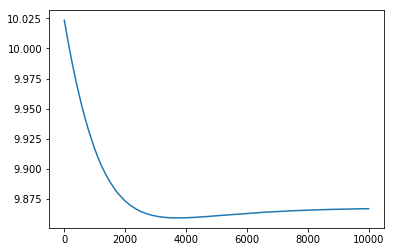

In [192]:
plt.plot(np.log(np.array(res)- 373.4040155581676))
plt.show()